In [2]:
!pip install folium
# !pip install wget

     |████████████████████████████████| 102kB 7.2MB/s ta 0:00:011


In [4]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

# import wget
import os


import json # library to handle JSON files
from pprint import pprint # data pretty printer

import requests # library to handle requests
from bs4 import BeautifulSoup  # library to handle web scraping

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # map rendering library

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from collections import Counter # count occurrences 

from sklearn.cluster import KMeans # import k-means from clustering stage

In [5]:
# The code was removed by Watson Studio for sharing.

,Neighborhood
0,South Los Angeles
1,Southeast Los Angeles
2,Hollywood
3,Mid City
4,Van Nuys


In [6]:
#Finding coordinates of Los Angeles city using geolocator
address = 'Los Angeles City, California'
location = None

# define an instance of the geocoder -> foursquare_agent
while location == None:
    try:
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of Los Angelse City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angelse City are 34.0536909, -118.2427666.


In [7]:
#Finding coordinates of Los Angelse city Neighborhoods using geolocator
latitude_list = []
longitude_list = []

for neighborhood in la_neighborhoods['Neighborhood']:
    address = neighborhood+', Los Angeles, CA'
    location = None

    # define an instance of the geocoder -> foursquare_agent        
    while location == None:
        
        try:            
            geolocator = Nominatim(user_agent="foursquare_agent")
            location = geolocator.geocode(address)
            latitude_list.append(location.latitude)
            longitude_list.append(location.longitude)
            
        except:
            print(address)
            
print("Length of Latitude list ", len(latitude_list))
print("Length of Longitude list ", len(longitude_list))

Central, Los Angeles, CA
Central, Los Angeles, CA
Length of Latitude list  95
Length of Longitude list  95


In [8]:
la_neighborhoods['Latitude'] = latitude_list
la_neighborhoods['Longitude'] = longitude_list

In [9]:
la_neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,South Los Angeles,33.928291,-118.278813
1,Southeast Los Angeles,34.053691,-118.242767
2,Hollywood,34.098003,-118.329523
3,Mid City,34.041527,-118.360370
4,Van Nuys,34.186619,-118.448667


In [10]:
def create_folium_map(df, latitude, longitude):
    loc_map = folium.Map(location = [latitude, longitude], zoom_start=10)

    for lat, lon, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
        label = '{}'.format(neighborhood)
        label = folium.Popup(label, parse_html = True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup = label,
            color='black',
            fill=True,
            fill_color='#1c1c1c',
            fill_opacity=0.7,
            parse_html=False).add_to(loc_map) 

    return(loc_map)

In [11]:
la_map = create_folium_map(la_neighborhoods, latitude, longitude)
la_map

In [12]:
la_neighborhoods.to_csv()

',Neighborhood,Latitude,Longitude\n0,South Los Angeles,33.9282906,-118.2788135\n1,Southeast Los Angeles,34.0536909,-118.2427666\n2,Hollywood,34.0980031,-118.3295232\n3,Mid City,34.0415271,-118.3603703\n4,Van Nuys,34.1866193,-118.4486669\n5,Sun Valley,34.2204227,-118.3878945\n6,Northridge,34.2345615,-118.5369316\n7,Sylmar,34.3076252,-118.4492148\n8,Boyle Heights,34.0436892,-118.2097684\n9,North Hollywood,34.1729044,-118.3740371\n10,San Pedro,33.7358518,-118.2922934\n11,Koreatown,34.0617342,-118.3053732\n12,Woodland Hills,34.1684364,-118.6058382\n13,Sherman Oaks,34.1508718,-118.4489865\n14,Pacoima,34.2625025,-118.427027\n15,Westlake,34.0629226,-118.2728204\n16,Reseda,34.2000784,-118.5369884\n17,Panorama City,34.2242902,-118.4453745\n18,Valley Glen,34.1826379,-118.4138666\n19,North Hills,34.2429575,-118.4854081\n20,Wilmington,33.7800164,-118.2625095\n21,Canoga Park,34.2010776,-118.5978259\n22,Westwood,34.0668947,-118.4399448\n23,Central,34.0536909,-118.2427666\n24,Highland Park,34.1099469

In [13]:
CLIENT_ID = 'OEVQYGFMA22NPP0GVV4TEGS4CDNU2UWJXZK1FV2YV4ZLKKLH' # your Foursquare ID
CLIENT_SECRET = 'YEZ4GJ2OBG1ODWZ1PQ53EAMUTZFXHKM45ORK5OGEMOVV5PQ2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OEVQYGFMA22NPP0GVV4TEGS4CDNU2UWJXZK1FV2YV4ZLKKLH
CLIENT_SECRET:YEZ4GJ2OBG1ODWZ1PQ53EAMUTZFXHKM45ORK5OGEMOVV5PQ2


In [14]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [15]:
for i in range(len(category_results['response']['categories'])):
    print('_____________________________')
    print(category_results['response']['categories'][i]['name'])
    for key, value in category_results['response']['categories'][i].items(): 
        if key == 'categories':
            print(key, len((value)))

_____________________________
Arts & Entertainment
categories 36
_____________________________
College & University
categories 23
_____________________________
Event
categories 12
_____________________________
Food
categories 92
_____________________________
Nightlife Spot
categories 7
_____________________________
Outdoors & Recreation
categories 62
_____________________________
Professional & Other Places
categories 43
_____________________________
Residence
categories 5
_____________________________
Shop & Service
categories 145
_____________________________
Travel & Transport
categories 34


In [17]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

neighborhood_latitude = 33.928291
neighborhood_longitude = -118.278813
 


# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=OEVQYGFMA22NPP0GVV4TEGS4CDNU2UWJXZK1FV2YV4ZLKKLH&client_secret=YEZ4GJ2OBG1ODWZ1PQ53EAMUTZFXHKM45ORK5OGEMOVV5PQ2&v=20180605&ll=33.928291,-118.278813&radius=1000&categoryId=4d4b7105d754a06374d81259&limit=500'

In [18]:
results = requests.get(url).json()
len(results['response']['venues'])

34

In [19]:
results

{'meta': {'code': 200, 'requestId': '5ee3c33574cf2678a28527b2'},
 'response': {'venues': [{'id': '4b8736bef964a520c4b631e3',
    'name': 'Jack in the Box',
    'location': {'address': '11400 S Figueroa St',
     'lat': 33.93072024913725,
     'lng': -118.28219890594482,
     'labeledLatLngs': [{'label': 'display',
       'lat': 33.93072024913725,
       'lng': -118.28219890594482},
      {'label': 'entrance', 'lat': 33.93078, 'lng': -118.282333}],
     'distance': 413,
     'postalCode': '90061',
     'cc': 'US',
     'city': 'Los Angeles',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['11400 S Figueroa St',
      'Los Angeles, CA 90061',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'primary': T

In [36]:
def getNearbyFood(names, latitudes, longitudes, radius=8046, LIMIT=1000):
    not_found = 0
    CLIENT_ID = 'OEVQYGFMA22NPP0GVV4TEGS4CDNU2UWJXZK1FV2YV4ZLKKLH' # your Foursquare ID
    CLIENT_SECRET = 'YEZ4GJ2OBG1ODWZ1PQ53EAMUTZFXHKM45ORK5OGEMOVV5PQ2'
    VERSION = '20180605' # Foursquare API version
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

In [37]:
la_venues_df = getNearbyFood(names=la_neighborhoods['Neighborhood'],
                                        latitudes=la_neighborhoods['Latitude'],
                                        longitudes=la_neighborhoods['Longitude']
                                       )

***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Done*** with 0 venues with incompelete information.


In [38]:
print(la_venues_df.shape)
la_venues_df.head()

(4750, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,South Los Angeles,33.928291,-118.278813,Taco Bell,33.901042,-118.344162,Fast Food Restaurant
1,South Los Angeles,33.928291,-118.278813,Roscoe's House of Chicken and Waffles,33.961871,-118.367394,Southern / Soul Food Restaurant
2,South Los Angeles,33.928291,-118.278813,California Fish Grill,33.873654,-118.300346,Seafood Restaurant
3,South Los Angeles,33.928291,-118.278813,Starbucks,33.924318,-118.325842,Coffee Shop
4,South Los Angeles,33.928291,-118.278813,Dunkin',33.891738,-118.297735,Donut Shop


In [39]:
print('There are {} uniques categories.'.format(len(la_venues_df['Venue Category'].unique())))
la_venues_df.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 86 uniques categories.


Venue Category
Coffee Shop                        1199
Fast Food Restaurant                920
Donut Shop                          191
Bakery                              182
Café                                167
Burger Joint                        160
Supermarket                         142
Convenience Store                   112
Fried Chicken Joint                  88
Mexican Restaurant                   84
Ice Cream Shop                       75
Bubble Tea Shop                      67
Sandwich Place                       67
Food Court                           66
Seafood Restaurant                   51
American Restaurant                  49
Vegetarian / Vegan Restaurant        46
Japanese Restaurant                  46
Food Truck                           43
Deli / Bodega                        40
Juice Bar                            35
Mediterranean Restaurant             35
Grocery Store                        35
Breakfast Spot                       34
Farmers Market           

In [41]:
unique_categories = la_venues_df['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Fast Food Restaurant, Southern / Soul Food Restaurant, Seafood Restaurant, Coffee Shop, Donut Shop, Café, Burger Joint, Japanese Restaurant, Grocery Store, Bakery, Ramen Restaurant, Mexican Restaurant, Sandwich Place, Convenience Store, Deli / Bodega, Fried Chicken Joint, Food, Hawaiian Restaurant, Bubble Tea Shop, Frozen Yogurt Shop, African Restaurant, Ice Cream Shop, Indian Restaurant, Food Court, Vegetarian / Vegan Restaurant, Food Truck, Shopping Mall, Market, Taco Place, Sake Bar, Breakfast Spot, Supermarket, Thai Restaurant, Brewery, Salad Place, Greek Restaurant, Diner, Juice Bar, Sushi Restaurant, Farmers Market, Cuban Restaurant, Cafeteria, Gourmet Shop, Creperie, Mediterranean Restaurant, Italian Restaurant, Gas Station, BBQ Joint, American Restaurant, Poke Place, Noodle House, Dessert Shop, Smoothie Shop, Middle Eastern Restaurant, Chinese Restaurant, Food Service, Bagel Shop, Restaurant, Hot Dog Joint, Pizza Place, Tex-Mex Restaurant, Steakhouse, Asian Restaurant, Wings Jo

In [45]:
len(unique_categories)

86

In [42]:
# manually create a list of generalized categories
general_categories = ['Dessert Shop','Food','Ice Cream Shop','Donut Shop','Bakery','Sandwich Place','Comfort Food Restaurant',
                    'Deli / Bodega','Food Truck','Bagel Shop','Burger Joint','Restaurant','Frozen Yogurt Shop','Coffee Shop',
                    'Diner','Wings Joint','Café','Juice Bar','Breakfast Spot','Grocery Store','Bar','Cupcake Shop',
                    'Pub','Fish & Chips Shop','Cafeteria','Other Nightlife','Arcade','Hot Dog Joint','Food Court',
                    'Health Food Store','Convenience Store','Food & Drink Shop','Cocktail Bar','Cheese Shop',
                    'Snack Place','Sports Bar','Lounge','Theme Restaurant','Buffet','Bubble Tea Shop','Building',
                    'Irish Pub','College Cafeteria','Tea Room','Supermarket','Hotpot Restaurant','Gastropub','Beer Garden',
                    'Fish Market','Beer Bar','Clothing Store','Music Venue','Bistro','Salad Place','Wine Bar','Gourmet Shop',
                    'Indie Movie Theater','Art Gallery','Gift Shop','Pie Shop','Fruit & Vegetable Store',
                    'Street Food Gathering','Dive Bar','Factory','Farmers Market','Mac & Cheese Joint','Creperie',
                    'Candy Store','Event Space','Skating Rink','Miscellaneous Shop','Gas Station','Organic Grocery',
                    'Pastry Shop','Club House','Flea Market','Hotel','Furniture / Home Store','Bookstore','Pet Café',
                    'Gym / Fitness Center','Flower Shop','Financial or Legal Service','Hotel Bar','Hookah Bar','Poke Place',
                    'Market','Gluten-free Restaurant','Smoothie Shop','Butcher','Food Stand','Beach Bar','Beach',
                    'Soup Place','Rock Club','Residential Building (Apartment / Condo)','Laundry Service',
                    'Government Building','Bowling Alley','Nightclub','Park','Moving Target']

In [43]:
# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Udon Restaurant, Greek Restaurant, Middle Eastern Restaurant, Hawaiian Restaurant, Asian Restaurant, Korean Restaurant, New American Restaurant, Food Service, English Restaurant, BBQ Joint, Tex-Mex Restaurant, Thai Restaurant, Taco Place, Vietnamese Restaurant, Kebab Restaurant, Liquor Store, Indian Restaurant, Shabu-Shabu Restaurant, Pizza Place, Filipino Restaurant, Japanese Restaurant, Donburi Restaurant, Shopping Mall, Chinese Restaurant, Plaza, Southern / Soul Food Restaurant, Afghan Restaurant, Cuban Restaurant, Sushi Restaurant, Fast Food Restaurant, Taiwanese Restaurant, Steakhouse, Fried Chicken Joint, Temple, Mediterranean Restaurant, Seafood Restaurant, Sake Bar, Vegetarian / Vegan Restaurant, African Restaurant, Australian Restaurant, Noodle House, Dim Sum Restaurant, Falafel Restaurant, Mexican Restaurant, Ramen Restaurant, French Restaurant, Brewery, Dumpling Restaurant, Italian Restaurant, American Restaurant


In [44]:
len(food_categories)

50

In [46]:
la_venues_df = la_venues_df[la_venues_df['Venue Category'].isin(food_categories)].reset_index()
la_venues_df.head(5)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,South Los Angeles,33.928291,-118.278813,Taco Bell,33.901042,-118.344162,Fast Food Restaurant
1,1,South Los Angeles,33.928291,-118.278813,Roscoe's House of Chicken and Waffles,33.961871,-118.367394,Southern / Soul Food Restaurant
2,2,South Los Angeles,33.928291,-118.278813,California Fish Grill,33.873654,-118.300346,Seafood Restaurant
3,5,South Los Angeles,33.928291,-118.278813,Carl's Jr.,33.902674,-118.351993,Fast Food Restaurant
4,9,South Los Angeles,33.928291,-118.278813,Shinsengumi Shabu Shabu,33.873319,-118.306573,Japanese Restaurant


In [49]:
la_venues_df.shape

(1812, 8)

In [47]:
print('There are {} unique FOOD categories.'.format(len(la_venues_df['Venue Category'].unique())))

There are 50 unique FOOD categories.


In [50]:
print('There are {} uniques venues.'.format(len(la_venues_df['Venue'])))

There are 1812 uniques venues.


In [52]:
# one hot encoding
la_dummies_df = pd.get_dummies(la_venues_df[['Venue Category']], prefix="", prefix_sep="")
la_dummies_df.insert(0, 'Neighborhood', la_venues_df['Neighborhood'])
la_dummies_df.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Brewery,Chinese Restaurant,Cuban Restaurant,...,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Temple,Tex-Mex Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
la_dummies_df.shape

(1812, 51)

In [54]:
venue_counts = la_dummies_df.groupby('Neighborhood').sum()
venue_counts.head(5)

,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Brewery,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,...,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Temple,Tex-Mex Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Adams-Normandie,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,2,0
Arleta,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Arlington Heights,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Atwater Village,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
Bel Air,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
venue_counts.shape

(95, 50)

In [56]:
la_neighborhood_mean = la_dummies_df.groupby('Neighborhood').mean().reset_index()
la_neighborhood_mean.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Brewery,Chinese Restaurant,Cuban Restaurant,...,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Temple,Tex-Mex Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Adams-Normandie,0.0,0.0,0.000000,0.0,0.0,0.000000,0.052632,0.000000,0.0,...,0.0,0.000000,0.052632,0.0,0.000000,0.0,0.0,0.000000,0.105263,0.000000
1,Arleta,0.0,0.0,0.000000,0.0,0.0,0.043478,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.043478,0.0,0.0,0.000000,0.000000,0.043478
2,Arlington Heights,0.0,0.0,0.000000,0.0,0.0,0.000000,0.062500,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.062500,0.000000
3,Atwater Village,0.0,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.000000,0.0,...,0.0,0.058824,0.058824,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.000000
4,Bel Air,0.0,0.0,0.055556,0.0,0.0,0.000000,0.000000,0.055556,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.055556,0.000000,0.000000


In [57]:
def return_top_10_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [79]:
num_top_venues = 9

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

In [80]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_neighborhood_mean['Neighborhood']

In [81]:
for ind in np.arange(la_neighborhood_mean.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_top_10_venues(la_neighborhood_mean.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Adams-Normandie,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Seafood Restaurant,Taco Place,Brewery,Southern / Soul Food Restaurant,Shopping Mall,Dumpling Restaurant
1,Arleta,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Falafel Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Noodle House,Pizza Place,Italian Restaurant
2,Arlington Heights,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Brewery,Shopping Mall,Japanese Restaurant,Falafel Restaurant,Italian Restaurant,Indian Restaurant
3,Atwater Village,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Greek Restaurant,Taco Place,Sushi Restaurant,Brewery,Shopping Mall,Vietnamese Restaurant
4,Bel Air,Fast Food Restaurant,Udon Restaurant,Japanese Restaurant,American Restaurant,Greek Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Chinese Restaurant,Mexican Restaurant


# Clustering

In [62]:
la_clustering = la_neighborhood_mean.drop('Neighborhood', 1)

In [72]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,30)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(la_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(la_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

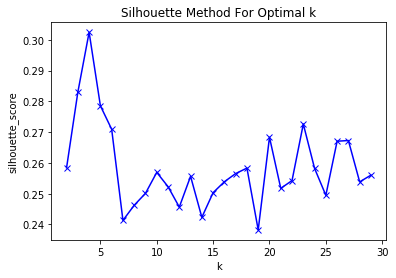

In [73]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [76]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(la_clustering)

print(Counter(kmeans.labels_))

Counter({1: 35, 0: 28, 2: 26, 3: 6})


In [82]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [83]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,2,Adams-Normandie,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Seafood Restaurant,Taco Place,Brewery,Southern / Soul Food Restaurant,Shopping Mall,Dumpling Restaurant
1,0,Arleta,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Falafel Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Noodle House,Pizza Place,Italian Restaurant
2,1,Arlington Heights,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Brewery,Shopping Mall,Japanese Restaurant,Falafel Restaurant,Italian Restaurant,Indian Restaurant
3,2,Atwater Village,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Greek Restaurant,Taco Place,Sushi Restaurant,Brewery,Shopping Mall,Vietnamese Restaurant
4,0,Bel Air,Fast Food Restaurant,Udon Restaurant,Japanese Restaurant,American Restaurant,Greek Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Chinese Restaurant,Mexican Restaurant


In [84]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
la_final_df = neighborhoods_venues_sorted.join(la_neighborhoods.set_index('Neighborhood'), on='Neighborhood')
la_final_df.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,Latitude,Longitude
0,2,Adams-Normandie,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Seafood Restaurant,Taco Place,Brewery,Southern / Soul Food Restaurant,Shopping Mall,Dumpling Restaurant,34.031788,-118.300247
1,0,Arleta,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Falafel Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Noodle House,Pizza Place,Italian Restaurant,34.241327,-118.432205
2,1,Arlington Heights,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Brewery,Shopping Mall,Japanese Restaurant,Falafel Restaurant,Italian Restaurant,Indian Restaurant,34.043494,-118.321374
3,2,Atwater Village,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Greek Restaurant,Taco Place,Sushi Restaurant,Brewery,Shopping Mall,Vietnamese Restaurant,34.118698,-118.262392
4,0,Bel Air,Fast Food Restaurant,Udon Restaurant,Japanese Restaurant,American Restaurant,Greek Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Chinese Restaurant,Mexican Restaurant,34.098883,-118.459881


In [99]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)+3))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_final_df['Latitude'], la_final_df['Longitude'], la_final_df['Neighborhood'], la_final_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters